Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

---

# Lab 11: Unsupervised Learning with $k$-means

In this lab, we begin our survey of common unsupervised learning methods.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise With Synthetic Data

In this exercise, you will
write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Then you'll plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    There is a naive implementation of the algorithm in this notebook below. You can use it as
    a beginning point or make your own implementation from scratch.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a>
    function from sklearn to synthesize the dataset,
    or you can do it yourself with `np.random.multivariate_normal`. :)
</details>

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3 ,cluster_std=2.5 ,random_state = 100)

# YOUR CODE HERE
# raise NotImplementedError()

In [4]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[-11.35272568  -8.56682917]
 [ -6.21243481   7.35137947]
 [-11.03480355 -10.41247358]
 [ -5.51768746  -8.55753167]
 [ -7.74047494  -5.59038013]]
y=
 [2 1 2 2 2]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data, separating the clusters by color.

In [5]:
y.shape

(300,)

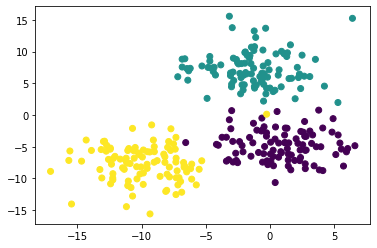

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y)
# raise NotImplementedError()

**Expected result** (or similar):

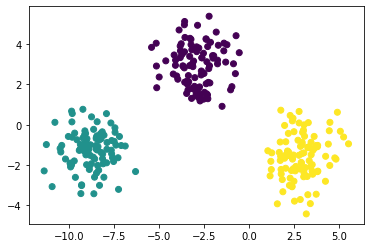

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

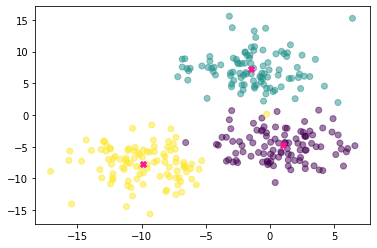

In [7]:
import numpy as np
from IPython.display import clear_output
import time
from sklearn.metrics import pairwise_distances_argmin

# 1. Initialize three random cluster centers

n_clusters= 3
rng = np.random.RandomState(42)
i = rng.permutation(len(y))[:n_clusters]
centers = X[i]
iterations = 0
while True:

    # 2. Find the nearest cluster center for each point
    labels = pairwise_distances_argmin(X, centers)
    
    
    # 3. Plot the data showing the cluster centers. Do not forget to use clear_output.
    clear_output(wait = True)
    plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.5)
    plt.scatter(centers[:,0], centers[ :,1], color = "deeppink", marker = "X")
    plt.show()
    # clear_output(wait = True)
    
    # 4. Find the mean of the points assigned to each cluster center
    new_centers = []
    for i in range(n_clusters):
        new_centers.append(X[labels == i].mean(axis=0))
    
    new_centers = np.array(new_centers)
    
    assert centers.shape == new_centers.shape
    # 5. Calculate the sum squared error between the currently assigned points' mean
    #    and the current center. If this error is less than 1e-6, stop the loop.
    error = np.sum((centers - new_centers)**2)
    iterations += 1
    if error < 1e-6:
        break
        
    else:
        centers = new_centers
        print(f"{iterations} : {error}")
        time.sleep(0.5)

# YOUR CODE HERE
# raise NotImplementedError()

In [8]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[-9.87361427 -7.71770803]
 [-1.44291481  7.19111195]
 [ 1.00943087 -4.79769975]]
success!


**Expected result** (or similar):

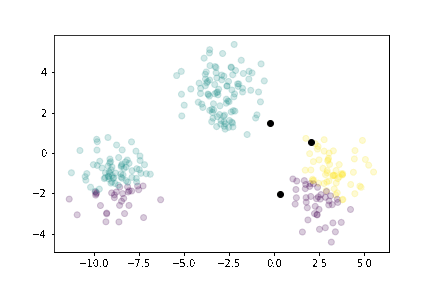

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [10]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [11]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

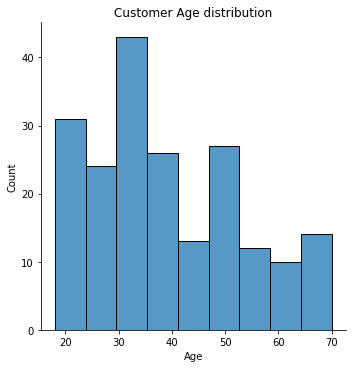

In [12]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

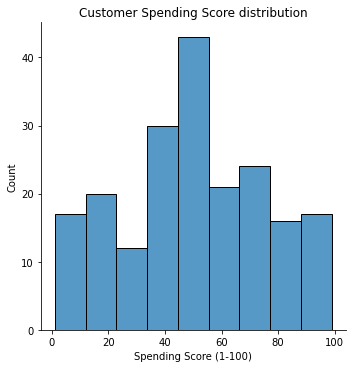

In [13]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

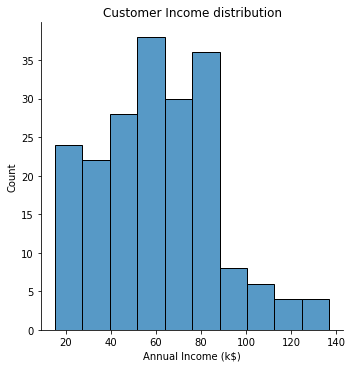

In [14]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

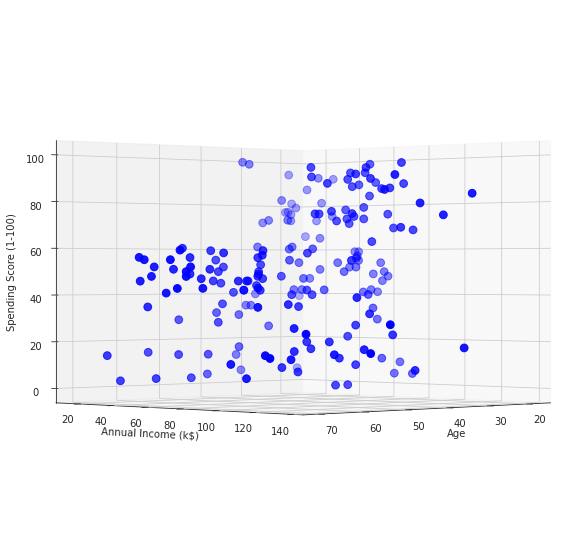

In [15]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [16]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

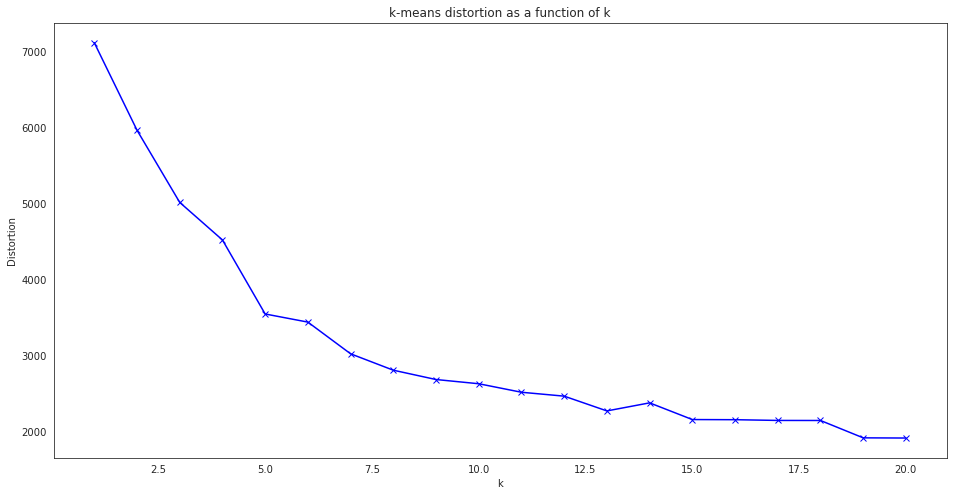

In [17]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

In [18]:
distortion

1923.3901546924728

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

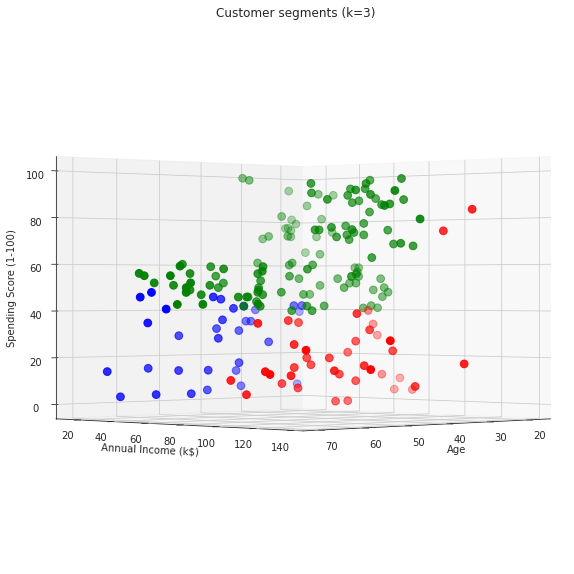

In [19]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

# ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

In this exercise we'll try to understand the three clusters above and also do a better job with the elbow plot.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

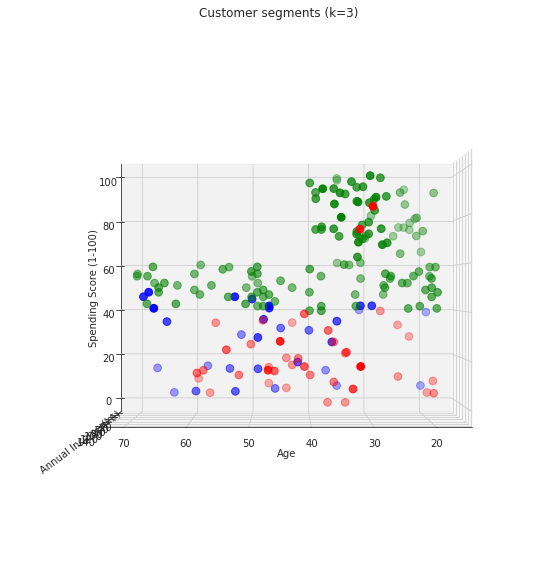

In [20]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

# ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 90)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

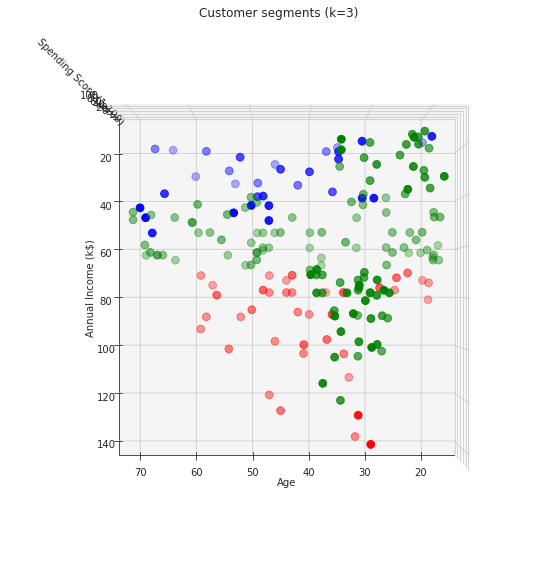

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

# ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(90, 90)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

In [22]:
aggregation = {"Age" : ["min", "max", "mean"], "Annual Income (k$)" : ["min", "max", "mean"], "Spending Score (1-100)" : ["min", "max", "mean"] }
df.groupby("label").agg(aggregation)

Age               Annual Income (k$)                  \
      min max      mean                min  max       mean   
label                                                        
0.0    19  69  46.90625                 15   54  31.625000   
1.0    19  59  39.92500                 70  137  89.225000   
2.0    18  70  36.50000                 15  120  58.835938   

      Spending Score (1-100)                 
                         min max       mean  
label                                        
0.0                        3  48  27.312500  
1.0                        1  83  21.625000  
2.0                       40  99  64.851562

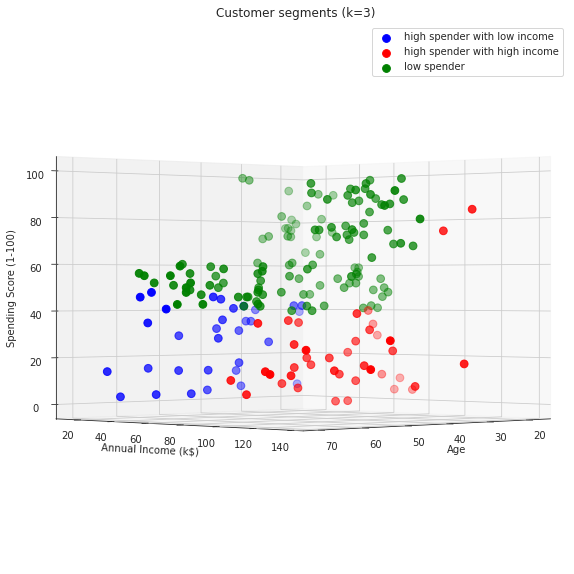

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60 , label = "high spender with low income")
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label = "high spender with high income")
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label = "low spender")

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.legend()
plt.show()

## Description of each cluster for the business point of view

`blue`(class 0) refers to younger customer segment with age ranging from 18 - 35, and lower annual income with mean of ~30k

`red` (class 1)  refers to relativelty older customer segment with age ranging from 27- 45, and significanly higher annual income with mean of ~88k

`green` (class 2) refers to customer segment whose spending score < 60, regardless of their annual income and age

---

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perform, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

In [24]:
max_k

20

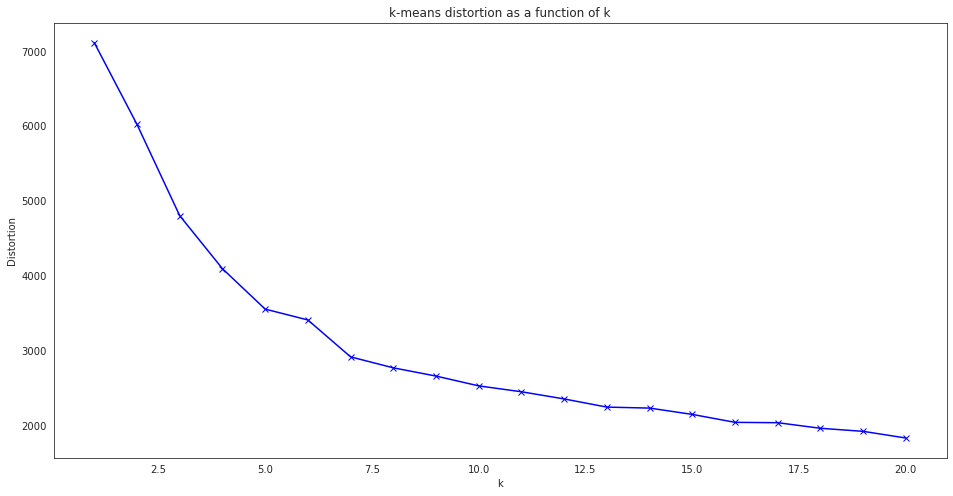

In [25]:
num_runs = 10
distortions = np.zeros(max_k)

for k in range(1, max_k+1):
    for j in range(num_runs):
        means = means = init_kmeans(X, k)
        prev_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if prev_distortion > 0 and prev_distortion - distortion < epsilon:
                break
            
            prev_distortion = distortion
            
        if j == 0 or distortion < distortions[k-1]:
            distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [26]:
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install kmeans-pytorch
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install tqdm

In [27]:
import torch
from kmeans_pytorch import kmeans

In [28]:
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 16it [00:00, 686.00it/s, center_shift=0.000000, iteration=16, tol=0.000100] 


In [29]:
means

tensor([[32.9756, 88.7317, 79.2439],
        [26.5952, 33.1429, 65.6667],
        [45.3077, 60.5299, 34.4701]])

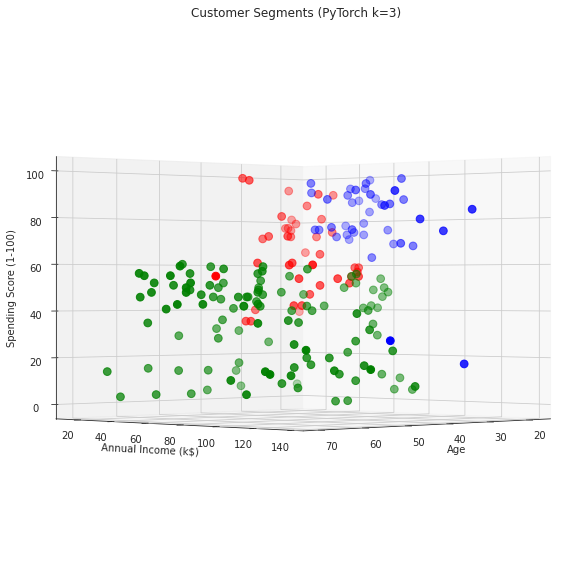

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/gcmadhan/unsupervised-learning-countries-need-finance
https://www.kaggle.com/lauraviera/using-ml-to-allocate-funding-for-development-aid

In [32]:
dataset = pd.read_csv("Country-data.csv")
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [35]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Look at the data distribution of each numerical column

In [36]:
numeric_col = dataset.select_dtypes(exclude = 'object').columns
print(len(numeric_col))

9


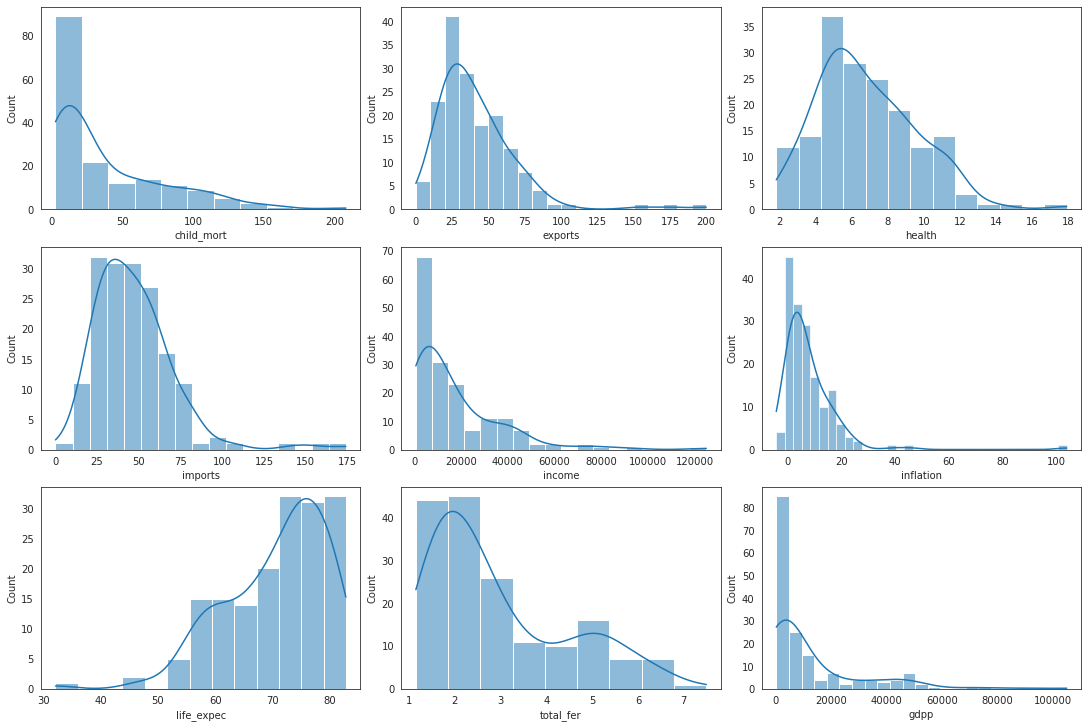

In [37]:
fig, axes = plt.subplots(3,3, figsize = (15,10), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(dataset[col], ax = axes[i], kde = True)
    

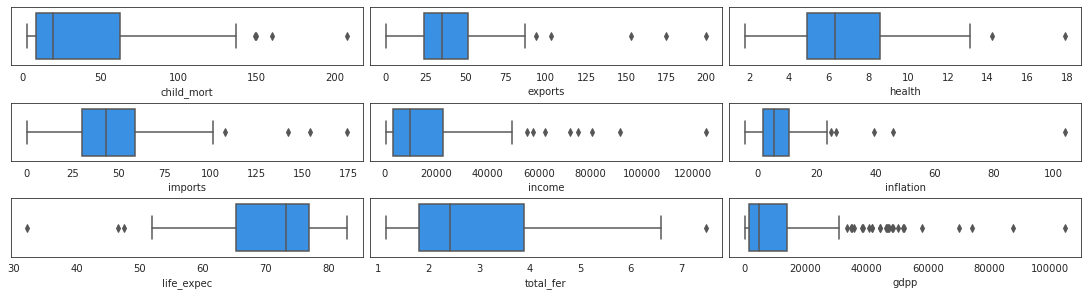

In [38]:
fig, axes = plt.subplots(3,3, figsize = (15,4), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(x = dataset[col], ax = axes[i], color = 'dodgerblue')
    

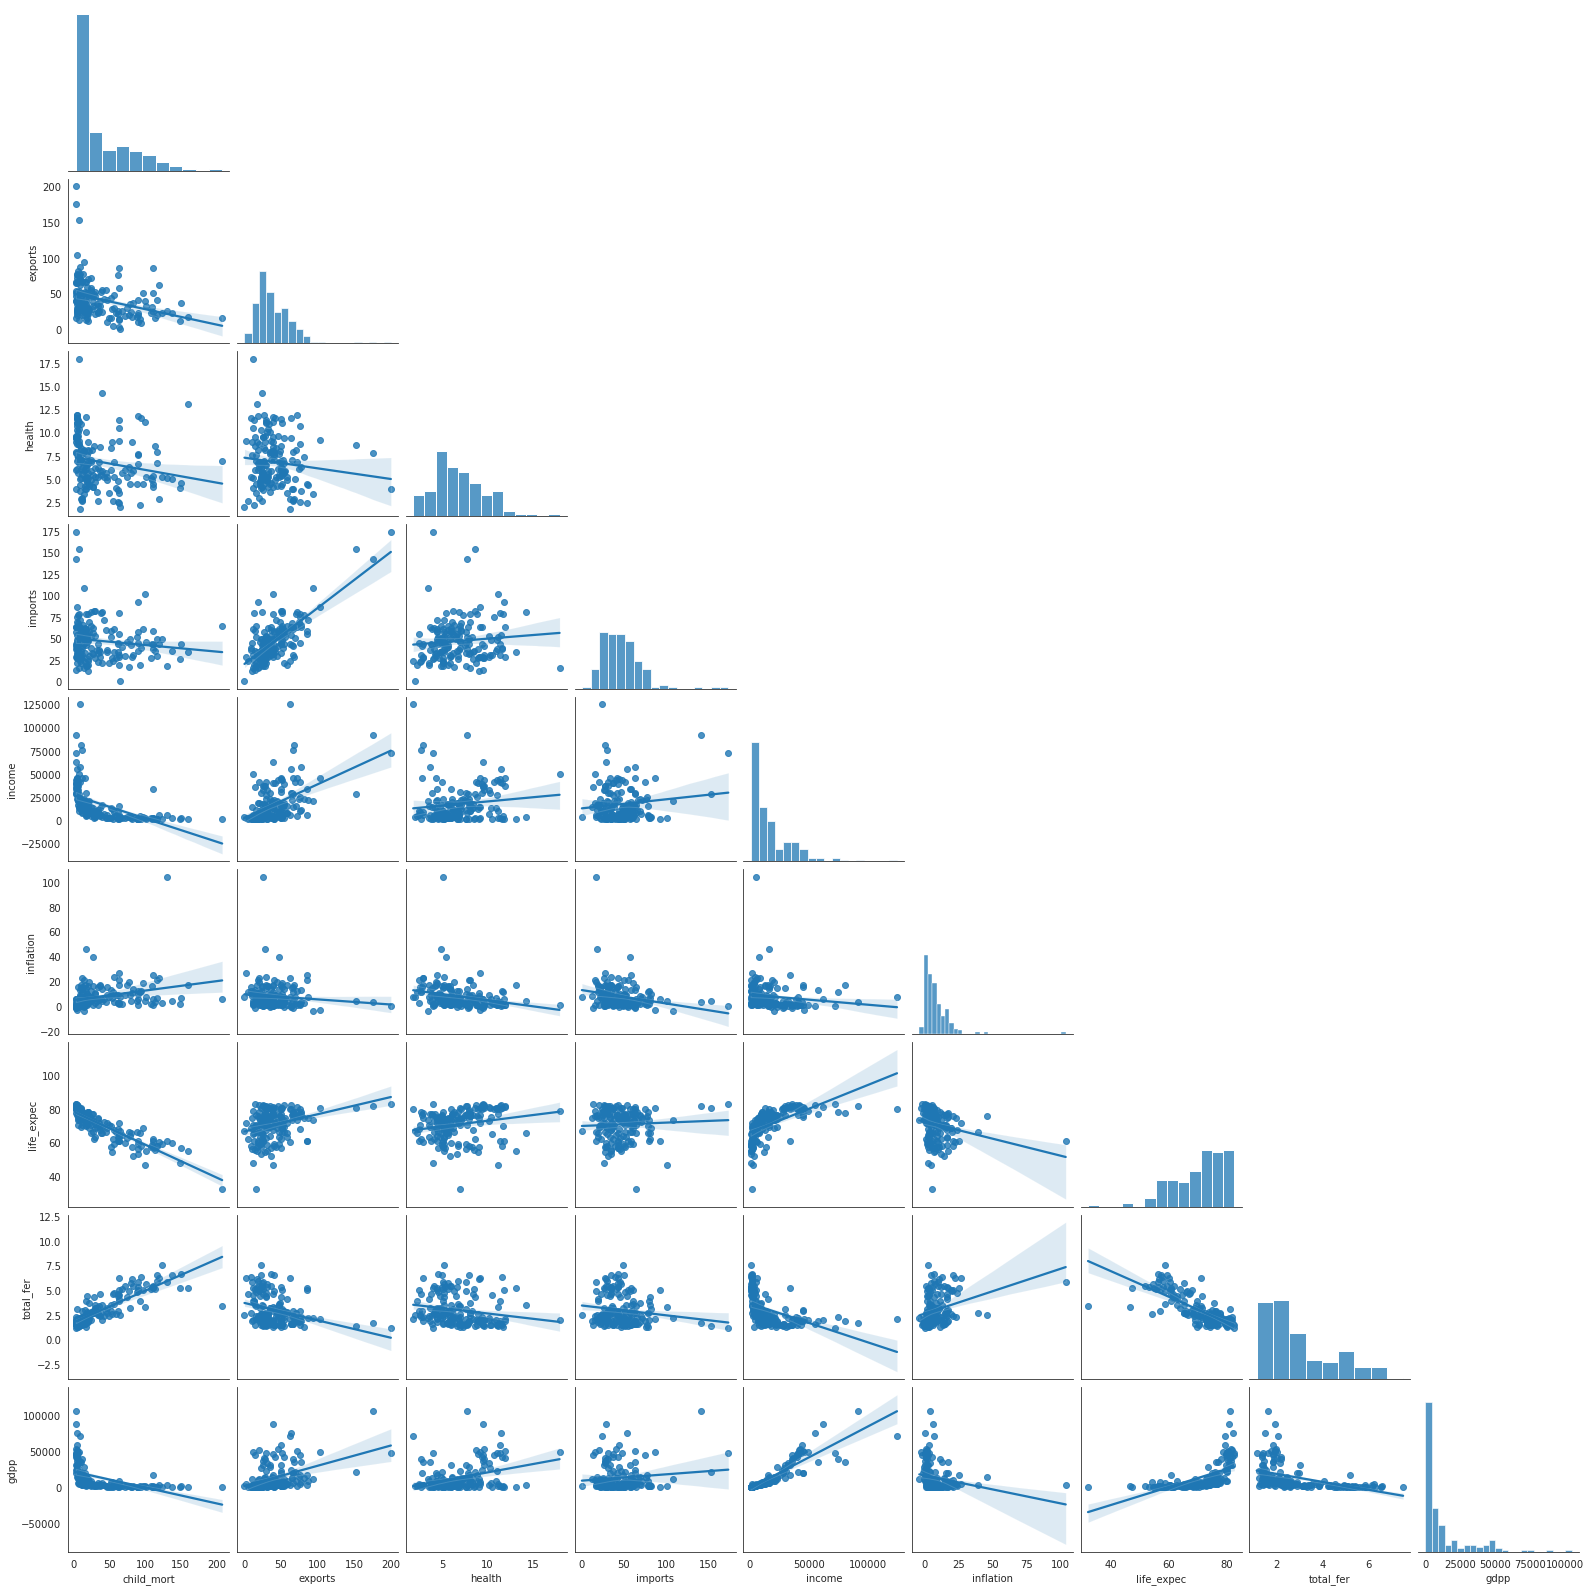

In [39]:
sns.pairplot(dataset, corner =True, kind = 'reg')

<AxesSubplot:>

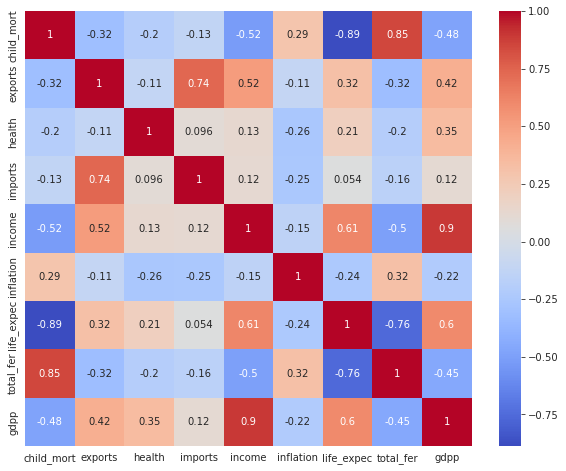

In [40]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')

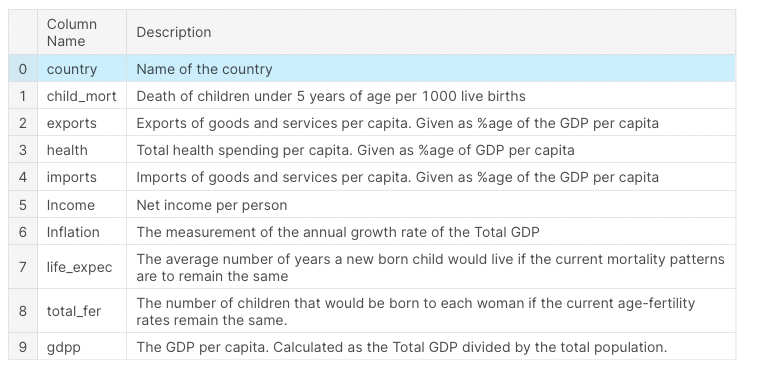

In [41]:
new_df = dataset.drop('country', axis = 1)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [43]:
s_scaler = StandardScaler()
s_scaled_df = s_scaler.fit_transform(new_df)

In [44]:
pca = PCA(svd_solver = 'auto')
pca.fit(s_scaled_df)

PCA()

In [45]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'explaned variance ratio')

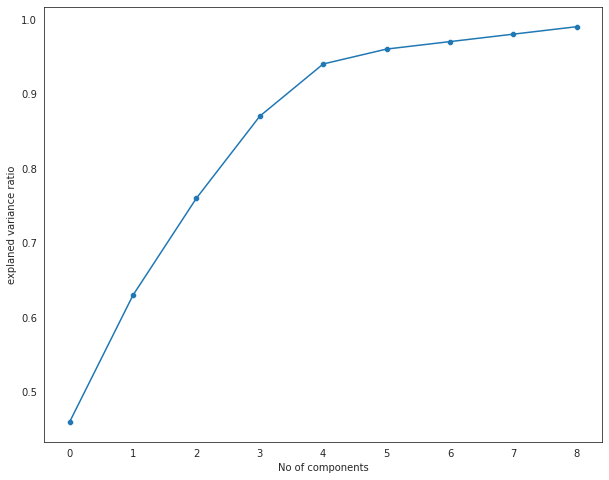

In [46]:
cum_exp_ratio = np.cumsum(np.round(pca.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

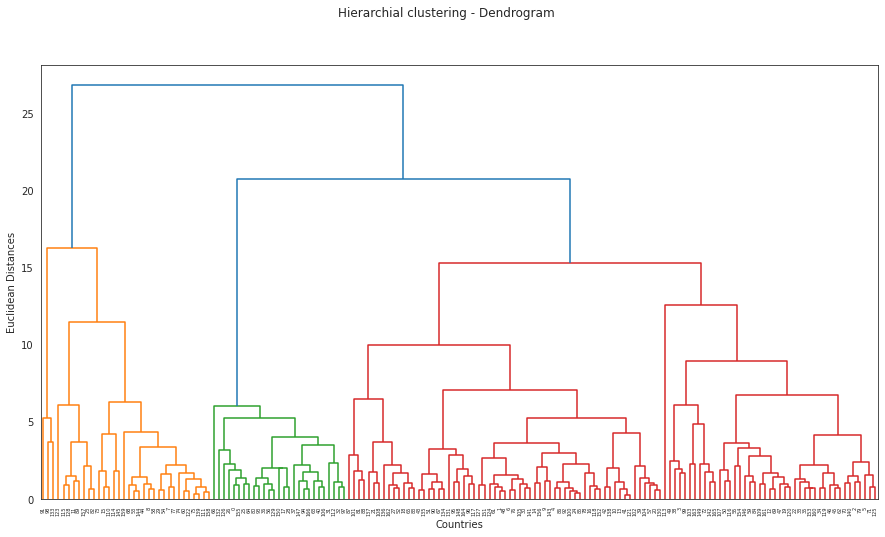

In [47]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(s_scaled_df, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

In [48]:
km = KMeans(n_clusters = 3, init = 'random', tol = 1e-4, random_state = 10)

In [49]:
km.fit_predict(s_scaled_df)

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [50]:
km.inertia_

831.4244352086874

`km.inertia_` returns Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

In [51]:
km.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [52]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(s_scaled_df, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.283


Now let's create differet number of clusters and see the distortion (loss for Kmeans)

Text(0, 0.5, 'silhoutte score')

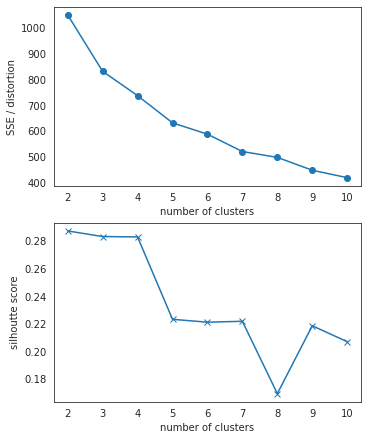

In [53]:
loss_record = []
silhouette_score_record = []
for clusters in range(2,11):
    km =  KMeans(n_clusters = clusters, 
                 init = 'random', tol = 1e-4, random_state = 10)
    km.fit(s_scaled_df)
    loss_record.append(km.inertia_)
    
    sil_score = silhouette_score(s_scaled_df, km.labels_, metric='euclidean')
    silhouette_score_record.append(sil_score)

    
fig,axes = plt.subplots(2,1, figsize = (5,6), constrained_layout = True)
axes[0].plot(range(2,11), loss_record, marker = 'o')
axes[0].set_xlabel('number of clusters')
axes[0].set_ylabel('SSE / distortion')


axes[1].plot(range(2,11), silhouette_score_record, marker = 'x')
axes[1].set_xlabel('number of clusters')
axes[1].set_ylabel('silhoutte score')

### Now let's repeat the same step with min_max scale data

In [54]:
mm_scaler = MinMaxScaler()
mm_scaled_df = mm_scaler.fit_transform(new_df)

In [55]:
mm_scaled_df

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

Text(0, 0.5, 'silhoutte score')

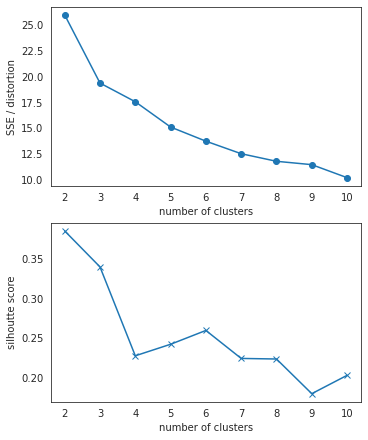

In [56]:
loss_record = []
silhouette_score_record = []
for clusters in range(2,11):
    km =  KMeans(n_clusters = clusters, 
                 init = 'random', tol = 1e-4, random_state = 10)
    km.fit(mm_scaled_df)
    loss_record.append(km.inertia_)
    
    sil_score = silhouette_score(mm_scaled_df, km.labels_, metric='euclidean')
    silhouette_score_record.append(sil_score)

    
fig,axes = plt.subplots(2,1, figsize = (5,6), constrained_layout = True)
axes[0].plot(range(2,11), loss_record, marker = 'o')
axes[0].set_xlabel('number of clusters')
axes[0].set_ylabel('SSE / distortion')


axes[1].plot(range(2,11), silhouette_score_record, marker = 'x')
axes[1].set_xlabel('number of clusters')
axes[1].set_ylabel('silhoutte score')

We see that the best model is the one with 3 clusters

In [57]:
final_km = KMeans(n_clusters = 3, 
                 init = 'random', tol = 1e-4, random_state = 10)
yhat = final_km.fit_predict(mm_scaled_df)
print(yhat)

[0 2 2 0 2 2 2 1 1 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 2 0 0 2 0 1 2 0 0 2 2 2 0
 0 0 2 0 2 1 1 1 2 2 2 2 0 0 2 2 1 1 0 0 2 1 0 1 2 2 0 0 2 0 2 1 2 2 2 0 1
 1 1 2 1 2 2 0 0 1 2 0 2 2 0 0 2 2 1 2 0 0 2 2 0 1 0 2 2 2 2 2 2 0 2 0 2 1
 1 0 0 1 2 0 2 2 2 2 2 1 1 2 2 0 2 2 0 2 2 0 1 1 1 0 2 1 1 2 2 0 2 1 1 2 0
 2 0 0 2 2 2 2 0 2 1 1 1 2 2 2 2 2 0 0]


In [58]:
final_km.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [59]:
dataset['cluster_label'] = final_km.labels_

In [60]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [61]:
dataset[dataset['cluster_label'] ==2]['country'] 

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 86, dtype: object

In [62]:
dataset.groupby('cluster_label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
1,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
2,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698


In [63]:
dataset.groupby('cluster_label').aggregate(['min', 'mean']).iloc[:, 2:]

exports            health            imports            income  \
                  min       mean    min      mean      min       mean    min   
cluster_label                                                                  
0               2.200  29.287174   2.20  6.338478  17.2000  43.297826    609   
1              12.400  58.431429   1.81  8.917429  13.6000  51.508571  25200   
2               0.109  40.382430   1.97  6.215581   0.0659  46.932162   1990   

                            inflation            life_expec             \
                       mean       min       mean        min       mean   
cluster_label                                                            
0               3516.804348     0.885  12.097065       32.1  59.393478   
1              45802.857143    -3.220   2.535000       75.5  80.245714   
2              12770.813953    -4.210   7.609023       54.3  72.582558   

              total_fer             gdpp                
                    min      mean    min          mean  
cluster_label                                           
0                  3.15  5.090217    231   1695.913043  
1                  1.15  1.741143  16600  43117.142857  
2                  1.25  2.293256    592   6719.790698

In [91]:
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install plotly

In [108]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

In [93]:
dataset['cluster_name'] = final_km.labels_

In [94]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [95]:
#df['KMean_labels']=df['KMean_labels'].astype('category')
cat = {0:'Extremely Need Help',1:'No Help Needed',2:'Somewhat Need Help'}
dataset['cluster_name']= dataset['cluster_name'].map(cat)

In [96]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Extremely Need Help
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Somewhat Need Help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Somewhat Need Help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Extremely Need Help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Somewhat Need Help


In [138]:
px.choropleth(data_frame=dataset, locationmode='country names', locations='country', color='cluster_name', title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')

In [71]:
dataset.groupby('cluster_name').mean().sort_values("gdpp", ascending = False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
cluster_name,,,,,,,,,,
No Help Needed,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857,1.0
Somewhat Need Help,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698,2.0
Extremely Need Help,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043,0.0


## Summary
- after using 3 clusters to categorize 167 countries to predict their need of financial supports, we see the distinct patterns of No Help Needed countries(green), Somewhat Need Help (red), and Extremely Need Help (blue)
- Looking at the map and using real-world context we know that
     - green denotes developed countries like USA, Australia and Western Europoena countries
     - blue denotes extremely poor countris mostly in Africa
     - and red denotes the remaining countries that falls between the other two kinds
     
---